In [31]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
path = "/content/drive/My Drive/APAN56-Datathon/SriLanka_Weather_Dataset.csv"
df = pd.read_csv(path)

In [33]:
df.describe()

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.0,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000
mean,46.647776,29.242367,23.899913,26.225590,34.112355,27.711096,30.317066,18.483513,5.975637,5.975637,0.0,8.762524,15.561288,34.796932,182.881625,3.896143,7.123334,80.263335,111.733333
std,21.623876,2.120345,2.059291,1.842147,2.966144,2.835051,2.540275,4.214270,10.215294,10.215294,0.0,7.191010,6.213737,10.214372,93.670247,1.023126,0.798620,0.488871,266.380824
min,0.000000,17.500000,12.100000,16.300000,18.500000,10.500000,16.300000,1.230000,0.000000,0.000000,0.0,0.000000,2.200000,11.500000,0.000000,0.420000,6.000000,79.800020,0.000000
25%,51.000000,28.200000,23.100000,25.600000,32.400000,26.400000,29.200000,16.220000,0.400000,0.400000,0.0,2.000000,11.000000,26.600000,88.000000,3.260000,6.800003,79.899994,7.000000
50%,53.000000,29.200000,24.300000,26.400000,34.200000,28.400000,30.800000,19.130000,2.600000,2.600000,0.0,8.000000,15.000000,33.100000,215.000000,3.890000,6.900002,80.000000,14.000000
75%,61.000000,30.400000,25.200000,27.200000,36.100000,29.600000,31.900000,21.510000,7.500000,7.500000,0.0,14.000000,18.900000,41.800000,249.000000,4.550000,7.400002,80.399994,27.000000
max,65.000000,37.500000,30.000000,31.800000,43.400000,34.700000,37.400000,28.980000,338.800000,338.800000,0.0,24.000000,50.200000,91.800000,360.000000,8.140000,9.700005,81.800020,1281.000000


<ipython-input-34-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

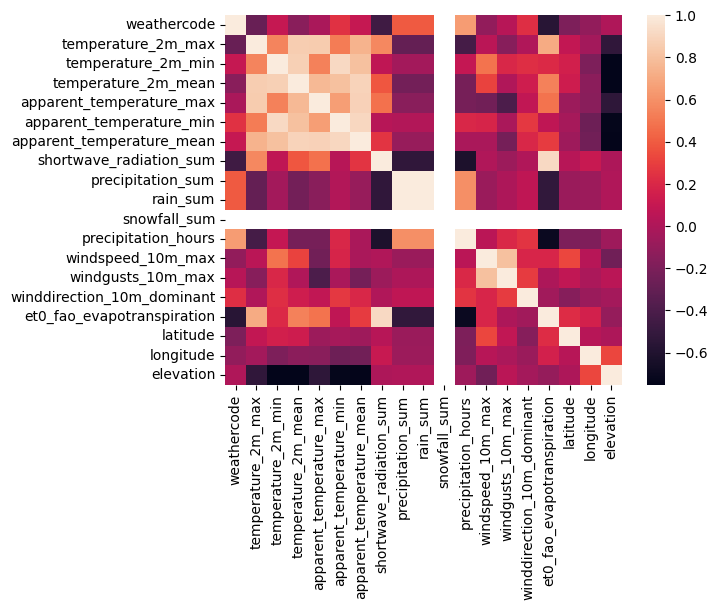

In [34]:
sns.heatmap(df.corr())

In [35]:
cities = pd.DataFrame({'Cities' : df.city.unique()})
latitudes = []
longitudes = []
# cities.head()
for i in range(cities['Cities'].size):
    lat = df.loc[df['city'] == cities['Cities'].iloc[i]]['latitude'].iloc[0]
    long = df.loc[df['city'] == cities['Cities'].iloc[i]]['longitude'].iloc[0]
    latitudes.append(lat)
    longitudes.append(long)
cities['latitude'] = latitudes; cities['longitude'] = longitudes

In [36]:
# Extract year, month, and day from the 'time' column
df['year'] = pd.to_datetime(df['time']).dt.year
df['month'] = pd.to_datetime(df['time']).dt.month
df['day'] = pd.to_datetime(df['time']).dt.day

# Extract hour and minute from the 'sunrise' column
df['sunrise_hour'] = pd.to_datetime(df['sunrise']).dt.hour
df['sunrise_minute'] = pd.to_datetime(df['sunrise']).dt.minute

# Extract hour and minute from the 'sunset' column
df['sunset_hour'] = pd.to_datetime(df['sunset']).dt.hour
df['sunset_minute'] = pd.to_datetime(df['sunset']).dt.minute

# Drop the unnecessary columns
df.drop(columns=['time', 'sunrise', 'sunset', 'country', 'city', 'snowfall_sum'], inplace=True)

df = df.apply(pd.to_numeric)
print(df.columns)
print(df.info())
print(df.columns)
# print the column names which doesn't have numerical dtype
print(df.select_dtypes(exclude=['int', 'float']).columns)
# print the column names which has null values
print(df.columns[df.isnull().any()])

Index(['weathercode', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean',
       'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum',
       'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max',
       'winddirection_10m_dominant', 'et0_fao_evapotranspiration', 'latitude',
       'longitude', 'elevation', 'year', 'month', 'day', 'sunrise_hour',
       'sunrise_minute', 'sunset_hour', 'sunset_minute'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   weathercode                 147480 non-null  int64  
 1   temperature_2m_max          147480 non-null  float64
 2   temperature_2m_min          147480 non-null  float64
 3   temperature_2m_mean         147480 

<Axes: >

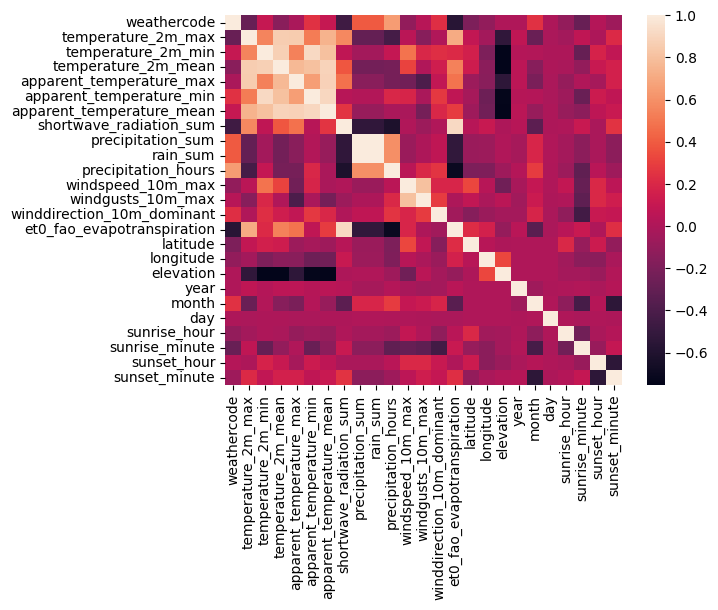

In [37]:
sns.heatmap(df.corr())

In [38]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df)
X_train_scaled

array([[-2.06475141,  0.35731702, -0.58268434, ...,  1.48728769,
        -0.20700503, -0.32528897],
       [ 0.20127006,  0.31015473, -0.1941998 , ...,  1.48728769,
        -0.20700503, -0.25825057],
       [ 0.20127006,  0.12150557, -0.3398815 , ...,  1.57197738,
        -0.20700503, -0.25825057],
       ...,
       [ 0.20127006,  0.26299244,  0.77701156, ..., -0.88402355,
        -0.20700503,  1.08251742],
       [ 0.29376074,  0.59312847,  0.77701156, ..., -0.79933386,
        -0.20700503,  1.08251742],
       [ 0.20127006,  0.16866786,  0.63132986, ..., -0.79933386,
        -0.20700503,  1.08251742]])

In [39]:
input_dim = X_train_scaled.shape[1]

# Encoder
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu')
])

# Decoder
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(16,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(input_dim, activation='linear')
])

# Autoencoder = Encoder + Decoder
autoencoder = tf.keras.Sequential([encoder, decoder])

autoencoder.compile(optimizer='adam', loss='mse')


In [40]:
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
4148/4148 [==============================] - 7s 2ms/step - loss: 0.0590 - val_loss: 0.0475
Epoch 2/50
4148/4148 [==============================] - 6s 1ms/step - loss: 0.0099 - val_loss: 0.0383
Epoch 3/50
4148/4148 [==============================] - 6s 1ms/step - loss: 0.0066 - val_loss: 0.0366
Epoch 4/50
4148/4148 [==============================] - 6s 1ms/step - loss: 0.0055 - val_loss: 0.0349
Epoch 5/50
4148/4148 [==============================] - 6s 1ms/step - loss: 0.0049 - val_loss: 0.0261
Epoch 6/50
4148/4148 [==============================] - 8s 2ms/step - loss: 0.0044 - val_loss: 0.0212
Epoch 7/50
4148/4148 [==============================] - 6s 1ms/step - loss: 0.0041 - val_loss: 0.0207
Epoch 8/50
4148/4148 [==============================] - 6s 2ms/step - loss: 0.0038 - val_loss: 0.0274
Epoch 9/50
4148/4148 [==============================] - 6s 1ms/step - loss: 0.0034 - val_loss: 0.0253
Epoch 10/50
4148/4148 [==============================] - 6s 1ms/step - loss: 0.003

In [41]:
encoded_data = encoder.predict(X_train_scaled)


4609/4609 [==============================] - 4s 928us/step


Choosing no. of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

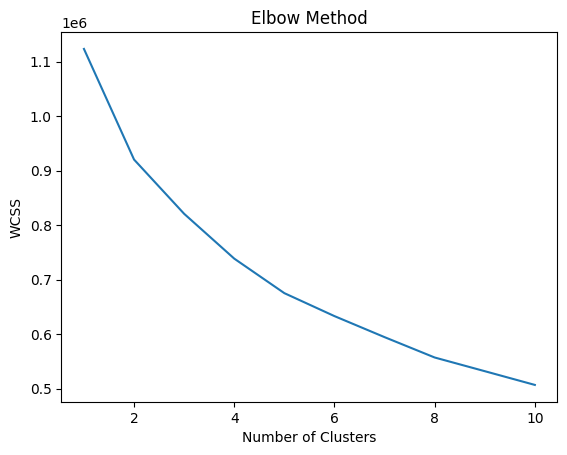

In [42]:
# Using Elbow Method to get insight about how many clusters should we choose
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(encoded_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within-Cluster Sum of Square
plt.show()


In [43]:
# from sklearn.metrics import silhouette_score

# silhouette_scores = []
# for i in range(2, 11): # Silhouette score requires at least 2 clusters
#     kmeans = KMeans(n_clusters=i, random_state=42)
#     clusters = kmeans.fit_predict(encoded_data)
#     silhouette_scores.append(silhouette_score(encoded_data, clusters))

# plt.plot(range(2, 11), silhouette_scores)
# plt.title('Silhouette Analysis')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()


In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(encoded_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
import numpy as np

# Print the unique cluster labels
unique_clusters = np.unique(clusters)
print("Unique cluster labels:", unique_clusters)

# Print the number of unique clusters
number_of_clusters = len(unique_clusters)
print("Number of clusters:", number_of_clusters)


Unique cluster labels: [0 1 2]
Number of clusters: 3


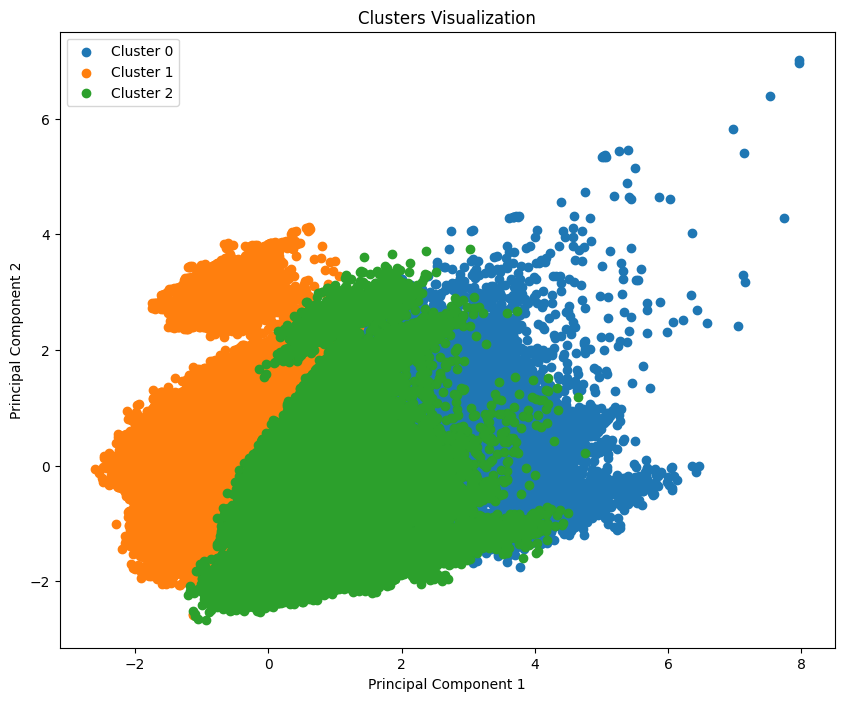

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(encoded_data)
clustered_data = np.hstack((reduced_data, clusters.reshape(-1, 1)))
plt.figure(figsize=(10, 8))

for cluster_num in np.unique(clusters):
    subset = clustered_data[clustered_data[:, 2] == cluster_num]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Cluster {cluster_num}')

plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


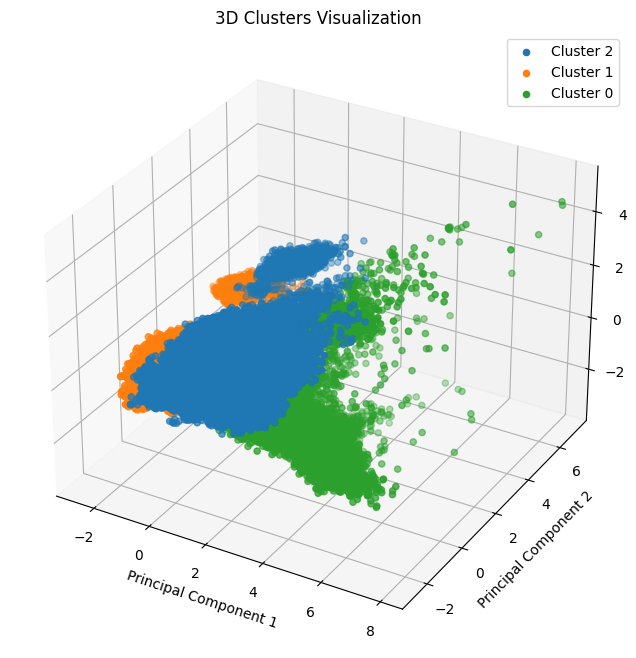

In [47]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(encoded_data)


df_3d = pd.DataFrame(reduced_data_3d, columns=['PC1', 'PC2', 'PC3'])
df_3d['Cluster'] = clusters


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_num in df_3d['Cluster'].unique():
    subset = df_3d[df_3d['Cluster'] == cluster_num]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=f'Cluster {cluster_num}')

ax.set_title('3D Clusters Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


In [48]:
# Rough Estimation Functions
def estimate_installation_expenses(row):
    # Example: Installation expenses might depend on latitude, longitude, elevation
    return row['latitude'] * 100 + row['longitude'] * 50 + row['elevation'] * 10

def estimate_maintenance_costs(row):
    # Example: Maintenance costs might depend on wind speed, temperature
    return row['windspeed_10m_max'] * 10 + row['temperature_2m_max'] * 5

def estimate_energy_production(row):
    # Example: Energy production might depend on shortwave radiation, wind speed
    return row['shortwave_radiation_sum'] * 0.5 + row['windspeed_10m_max'] * 0.5

def estimate_local_energy_price(row):
    # Since all data is from Sri Lanka, set a constant price or use other factors
    return 0.10

# Apply Estimations
df['installation_expenses'] = df.apply(estimate_installation_expenses, axis=1)
df['maintenance_costs'] = df.apply(estimate_maintenance_costs, axis=1)
df['energy_production_estimates'] = df.apply(estimate_energy_production, axis=1)
df['local_energy_price'] = df.apply(estimate_local_energy_price, axis=1)

# Calculate ROI
df['ROI'] = (df['energy_production_estimates'] * df['local_energy_price'] -
             (df['installation_expenses'] + df['maintenance_costs'])) / \
            (df['installation_expenses'] + df['maintenance_costs'])

# Now, 'df' contains the ROI value for each observation
print(df[['latitude', 'longitude', 'ROI']])

        latitude  longitude       ROI
0       7.000000  79.899994 -0.999682
1       7.000000  79.899994 -0.999701
2       7.000000  79.899994 -0.999707
3       7.000000  79.899994 -0.999676
4       7.000000  79.899994 -0.999592
...          ...        ...       ...
147475  6.900002  80.000000 -0.999684
147476  6.900002  80.000000 -0.999698
147477  6.900002  80.000000 -0.999724
147478  6.900002  80.000000 -0.999622
147479  6.900002  80.000000 -0.999701

[147480 rows x 3 columns]


In [49]:
df['cluster'] = clusters
df['cluster'].unique()

array([2, 1, 0], dtype=int32)

In [50]:
# Descriptive statistics for ROI within each cluster
descriptive_stats = df.groupby('cluster')['ROI'].describe()
print(descriptive_stats)


           count      mean       std       min       25%       50%       75%  \
cluster                                                                        
0        17333.0 -0.999859  0.000077 -0.999979 -0.999908 -0.999872 -0.999839   
1        87052.0 -0.999684  0.000063 -0.999934 -0.999721 -0.999683 -0.999648   
2        43095.0 -0.999650  0.000085 -0.999917 -0.999702 -0.999653 -0.999598   

              max  
cluster            
0       -0.999462  
1       -0.999436  
2       -0.999349  


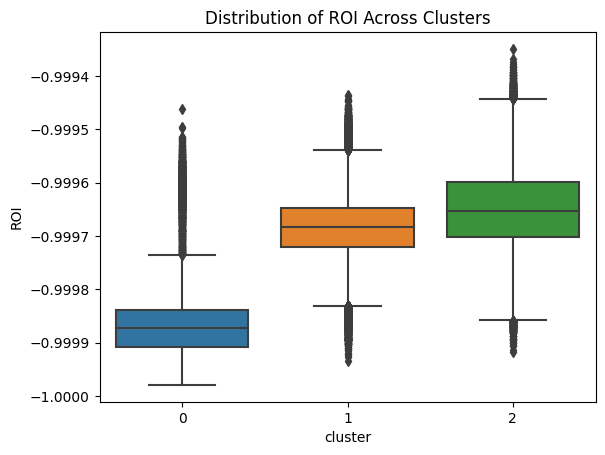

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize the distribution of ROI across clusters
sns.boxplot(x='cluster', y='ROI', data=df)
plt.title('Distribution of ROI Across Clusters')
plt.show()


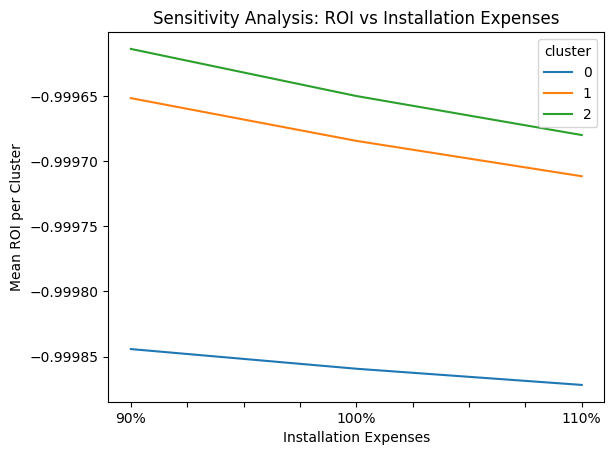

In [52]:
# Example: Sensitivity analysis for installation expenses
sensitivity_results = []
for factor in [0.9, 1.0, 1.1]: # Varying installation expenses by +/- 10%
    df['adjusted_installation_expenses'] = df['installation_expenses'] * factor
    df['adjusted_ROI'] = (df['energy_production_estimates'] * df['local_energy_price'] -
                          (df['adjusted_installation_expenses'] + df['maintenance_costs'])) / \
                         (df['adjusted_installation_expenses'] + df['maintenance_costs'])
    mean_ROI_per_cluster = df.groupby('cluster')['adjusted_ROI'].mean()
    sensitivity_results.append(mean_ROI_per_cluster)

# Convert to DataFrame and plot
sensitivity_df = pd.DataFrame(sensitivity_results)
sensitivity_df.index = ['90%', '100%', '110%'] # Installation expenses
sensitivity_df.plot(title='Sensitivity Analysis: ROI vs Installation Expenses')
plt.xlabel('Installation Expenses')
plt.ylabel('Mean ROI per Cluster')
plt.show()


In [53]:
# Assuming 'df' contains the ROI and city information (or latitude and longitude)
# Sort the DataFrame by ROI in descending order
df_sorted_by_ROI = df.sort_values(by='ROI', ascending=False)

# Get the top N cities with the best ROI (you can choose N as per your requirement)
N = 5
top_cities = df_sorted_by_ROI.head(N)

# Print the top cities and their ROI
print(top_cities[['latitude', 'longitude', 'ROI']]) # Replace 'city' with 'latitude' and 'longitude' if you have those instead


       latitude  longitude       ROI
62785  9.700005       80.0 -0.999349
63524  9.700005       80.0 -0.999367
59867  9.700005       80.0 -0.999374
60229  9.700005       80.0 -0.999377
62438  9.700005       80.0 -0.999382


In [58]:
# Group by latitude and longitude, and calculate the mean for specified columns and max for the cluster
grouped_df = df.groupby(['latitude', 'longitude']).agg({
    'ROI': 'mean',
    'adjusted_installation_expenses': 'mean',
    'adjusted_ROI': 'mean',
    'cluster': 'max' # Assuming you want the maximum cluster value
}).reset_index()
# Assuming you have a DataFrame 'city_data' with columns 'latitude', 'longitude', and 'city'
final_df = pd.merge(grouped_df, cities, on=['latitude', 'longitude'], how='left')
# Sort by adjusted ROI and get the top N cities
N = 10
top_cities = final_df.sort_values(by='adjusted_ROI', ascending=False).head(N)
print(top_cities[['latitude', 'longitude', 'ROI', 'cluster', 'adjusted_installation_expenses', 'adjusted_ROI', 'Cities']])


    latitude  longitude       ROI  cluster  adjusted_installation_expenses  \
29  9.700005  80.000000 -0.999574        2                     5522.000550   
28  8.900002  80.000000 -0.999593        2                     5445.000220   
27  8.599998  81.200010 -0.999615        2                     5489.000330   
3   6.200005  81.200010 -0.999618        2                     5280.001056   
1   6.000000  80.399994 -0.999626        2                     5147.999670   
0   6.000000  80.399994 -0.999626        2                     5147.999670   
2   6.099998  80.200010 -0.999633        2                     5247.000385   
26  8.000000  79.800020 -0.999652        2                     5269.001100   
23  7.400002  81.800020 -0.999662        2                     5401.001265   
5   6.599998  80.000000 -0.999676        2                     5125.999835   

    adjusted_ROI       Cities  
29     -0.999610       Jaffna  
28     -0.999627       Mannar  
27     -0.999648  Trincomalee  
3      -0.999

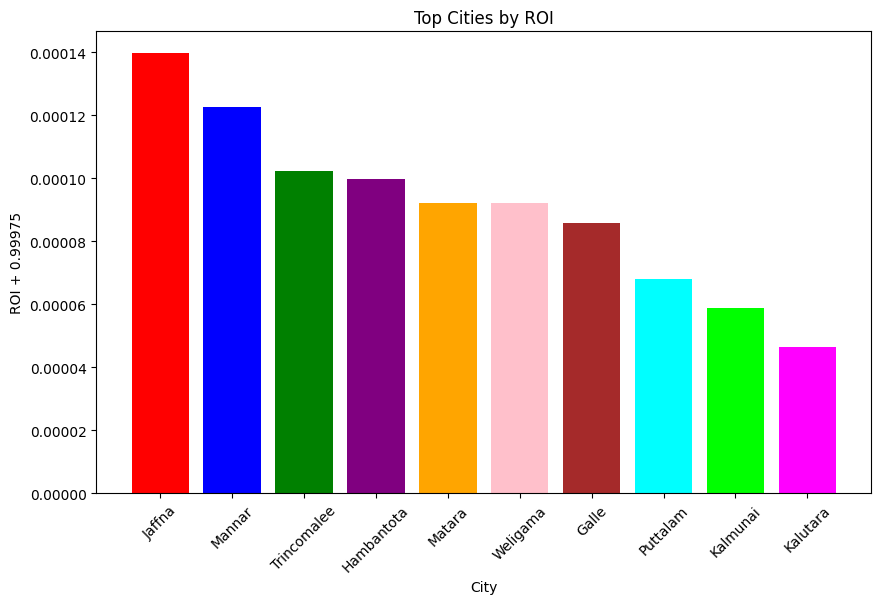

In [63]:
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'cyan', 'lime', 'magenta']

plt.figure(figsize=(10,6))
plt.bar(top_cities['Cities'], top_cities['adjusted_ROI'] + 0.99975, color=colors)
plt.xlabel('City')
plt.ylabel('ROI + 0.99975')
plt.title('Top Cities by ROI')
plt.xticks(rotation=45)
plt.show()
